# 1. Import Libraries

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Importing

In [ ]:
train_df = pd.read_csv(r"C:\Users\alexa\Work_Python\Data_Analysis\Project1_Titanic\data\train.csv")
test_df = pd.read_csv(r"C:\Users\alexa\Work_Python\Data_Analysis\Project1_Titanic\data\test.csv")

# 3. Exploratory Data Analysis (EDA)

## 3.1. Dataset Structure and Quality Review

In [55]:
def data_info(df, name):
    """
    Function to display basic information about the DataFrame including:
    - Shape (rows and columns)
    - Column names
    - Detailed info (including dtypes and non-null counts)
    - First 5 rows
    - Descriptive statistics for all columns
    - Count of missing values per column
    - Count of duplicated rows
    """
    print(name)
    print(f"DataFrame shape:\n{df.shape}\n")
    print(f"DataFrame columns:\n{df.columns.tolist()}\n")
    print(f"DataFrame info:\n{df.info()}\n")
    print(f"DataFrame head:\n{df.head()}\n")
    print(f"DataFrame description:\n{df.describe()}\n") # Summary for numeric columns
    print(f"DataFrame description:\n{df.describe(include=['object'])}\n") # Count of unique values in categorical variables
    print(f"DataFrame null values:\n{df.isnull().sum()}\n")  # Check for missing data
    print(f"DataFrame duplicates:\n{df.duplicated().sum()}\n")  # Check for duplicate rows
    print(f"Rows with Missing Values:\n{df.isna().any(axis=1).sum()}")

In [ ]:
data_info(train_df, "Training Dataset")

"""
Training DataFrame shape:
(891, 12)

Training DataFrame null values:
Age            177
Cabin          687
Embarked         2

Missing Values in Rows:
708
"""

Training Dataset
DataFrame shape:
(891, 12)

DataFrame columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
DataFrame info:
None

DataFrame head:
   PassengerId  Survived

'\nTraining DataFrame shape:\n(891, 12)\n\nTraining DataFrame null values:\nAge            177\nCabin          687\nEmbarked         2\n\nMissing Values in Rows:\n708\n'

In [ ]:
data_info(test_df, "Testing Dataset")

"""
Testing DataFrame shape:
(418, 11) -1 Survived

Testing DataFrame null values:
Age             86
Fare             1
Cabin          327

Missing Values in Rows:
331
"""

Testing Dataset
DataFrame shape:
(418, 11)

DataFrame columns:
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
DataFrame info:
None

DataFrame head:
   PassengerId  Pclass                                          Name     Sex  \

'\nTesting DataFrame shape:\n(418, 11) -1 Survived\n\nTesting DataFrame null values:\nAge             86\nFare             1\nCabin          327\n\nMissing Values in Rows:\n331\n'

## 3.2. `Survived` Distribution Summaries by Key Features

In [ ]:
summary_cols = [
    "Pclass", "Sex",
    "SibSp", "Parch",
    "Embarked"]

for col in summary_cols:
    summary_table = train_df.groupby(col)["Survived"].agg(
        mean="mean", median="median"
    ).round(2)
    print(f"\nSurvived Summary by {col.capitalize()}:\n")
    print(summary_table.reset_index().to_string(index=False))
    print("-" * 50)


Survived Summary by Pclass:

 Pclass  mean  median
      1  0.63     1.0
      2  0.47     0.0
      3  0.24     0.0
--------------------------------------------------

Survived Summary by Sex:

   Sex  mean  median
female  0.74     1.0
  male  0.19     0.0
--------------------------------------------------

Survived Summary by Sibsp:

 SibSp  mean  median
     0  0.35     0.0
     1  0.54     1.0
     2  0.46     0.0
     3  0.25     0.0
     4  0.17     0.0
     5  0.00     0.0
     8  0.00     0.0
--------------------------------------------------

Survived Summary by Parch:

 Parch  mean  median
     0  0.34     0.0
     1  0.55     1.0
     2  0.50     0.5
     3  0.60     1.0
     4  0.00     0.0
     5  0.20     0.0
     6  0.00     0.0
--------------------------------------------------

Survived Summary by Embarked:

Embarked  mean  median
       C  0.55     1.0
       Q  0.39     0.0
       S  0.34     0.0
--------------------------------------------------


## 3.3. Visualizing Distributions of Numerical Columns

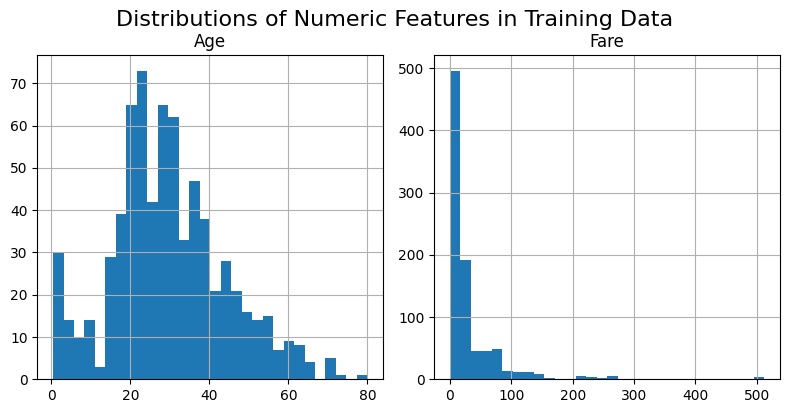

In [ ]:
train_df[["Age", "Fare"]].hist(bins=30, figsize=(8, 4))
plt.tight_layout()
plt.suptitle("Distributions of Numeric Features in Training Data", fontsize=16, y=1.02)
plt.show()

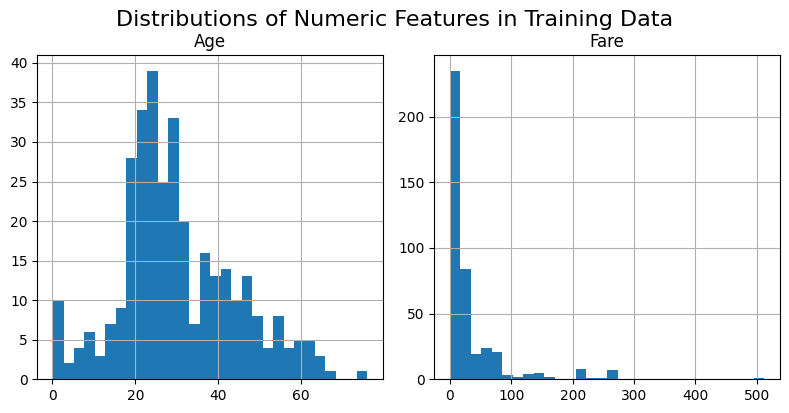

In [ ]:
test_df[["Age", "Fare"]].hist(bins=30, figsize=(8, 4))
plt.tight_layout()
plt.suptitle("Distributions of Numeric Features in Training Data", fontsize=16, y=1.02)
plt.show()

## 3.6. Visualizing Categorical Feature Frequencies

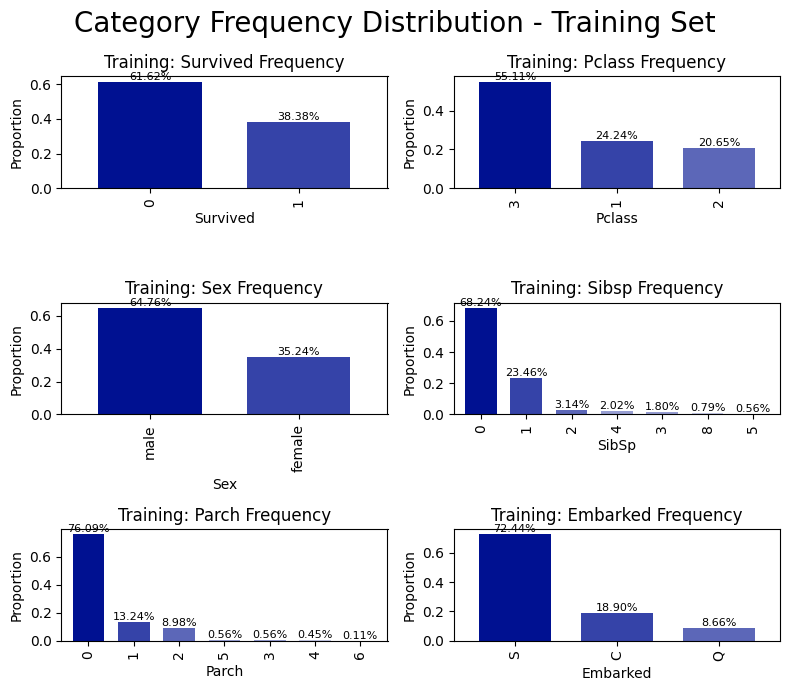

In [ ]:
categorical_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

cols = 2
n = len(categorical_cols)
rows = n // cols + int(n % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(8, 7))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = train_df[col].value_counts(normalize=True)
    ax = axes[i]
    bars = counts.plot(kind="bar", ax=ax, color=["#001191FF", "#001191CA", "#001191A3",
                                                 "#00119168", "#0011916A", "#0011913C",
                                                 "#0011912B"], width=0.7)
    ax.set_title(f"Training: {col.capitalize()} Frequency")
    ax.set_ylabel("Proportion")
    ax.set_xlabel(col)
    plt.setp(ax.get_xticklabels(), rotation=90)
    for p in bars.patches:
        percent = f"{100 * p.get_height():.2f}%"
        ax.annotate(percent, (p.get_x() + p.get_width()/2, p.get_height()), ha="center", va="bottom", fontsize=8)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Category Frequency Distribution - Training Set", size=20)
plt.tight_layout()
plt.show()

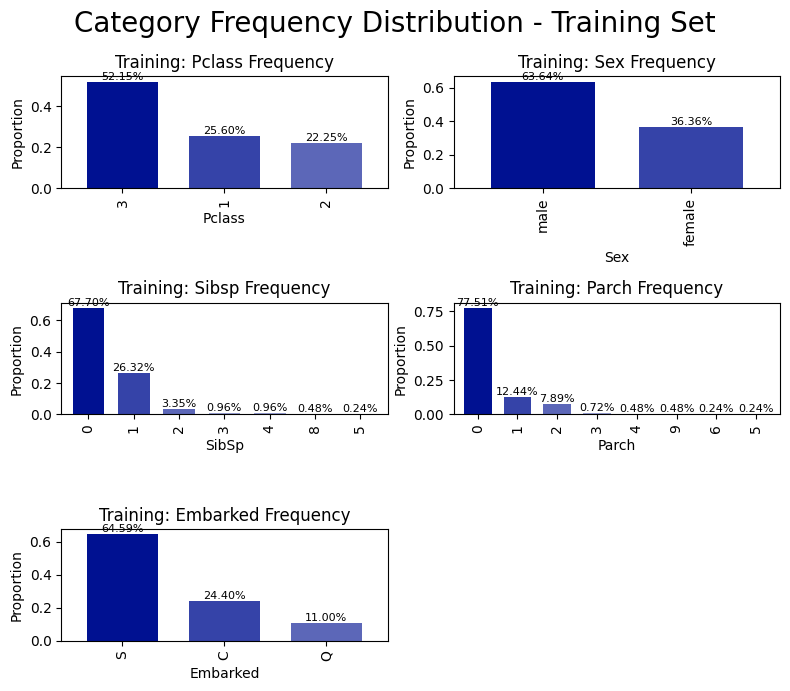

In [ ]:
categorical_cols = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

cols = 2
n = len(categorical_cols)
rows = n // cols + int(n % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(8, 7))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = test_df[col].value_counts(normalize=True)
    ax = axes[i]
    bars = counts.plot(kind="bar", ax=ax, color=["#001191FF", "#001191CA", "#001191A3",
                                                 "#00119168", "#0011916A", "#0011913C",
                                                 "#0011912B"], width=0.7)
    ax.set_title(f"Training: {col.capitalize()} Frequency")
    ax.set_ylabel("Proportion")
    ax.set_xlabel(col)
    plt.setp(ax.get_xticklabels(), rotation=90)
    for p in bars.patches:
        percent = f"{100 * p.get_height():.2f}%"
        ax.annotate(percent, (p.get_x() + p.get_width()/2, p.get_height()), ha="center", va="bottom", fontsize=8)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Category Frequency Distribution - Training Set", size=20)
plt.tight_layout()
plt.show()

## 3.7. Feature Relationships via Pair Plots

<Figure size 600x600 with 0 Axes>

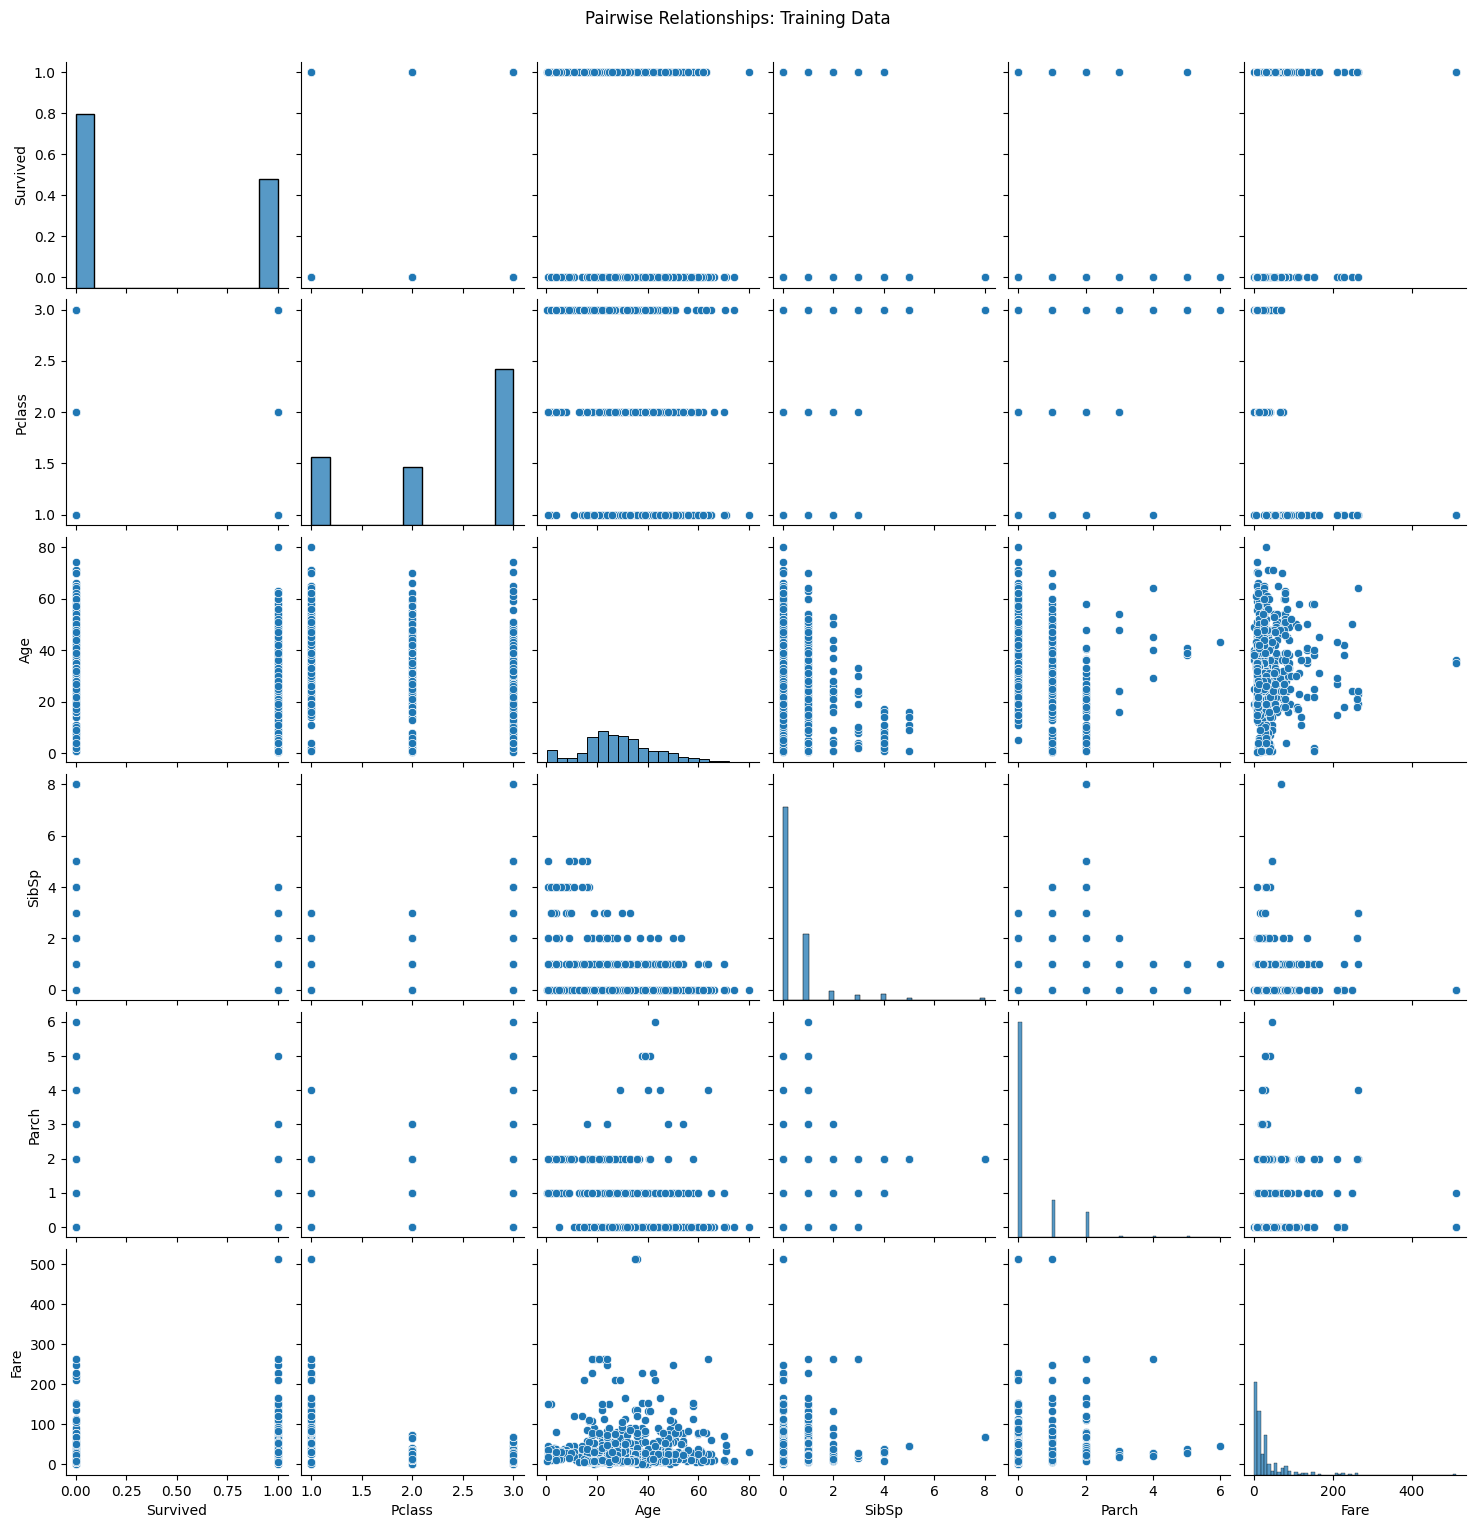

In [ ]:
train_numeric_cols = [
    "Survived", "Pclass", "Age", "SibSp",
    "Parch", "Fare"]

plt.figure(figsize=(6,6))
sns.pairplot(train_df[train_numeric_cols])
plt.suptitle("Pairwise Relationships: Training Data", y=1.02)
plt.show()

<Figure size 600x600 with 0 Axes>

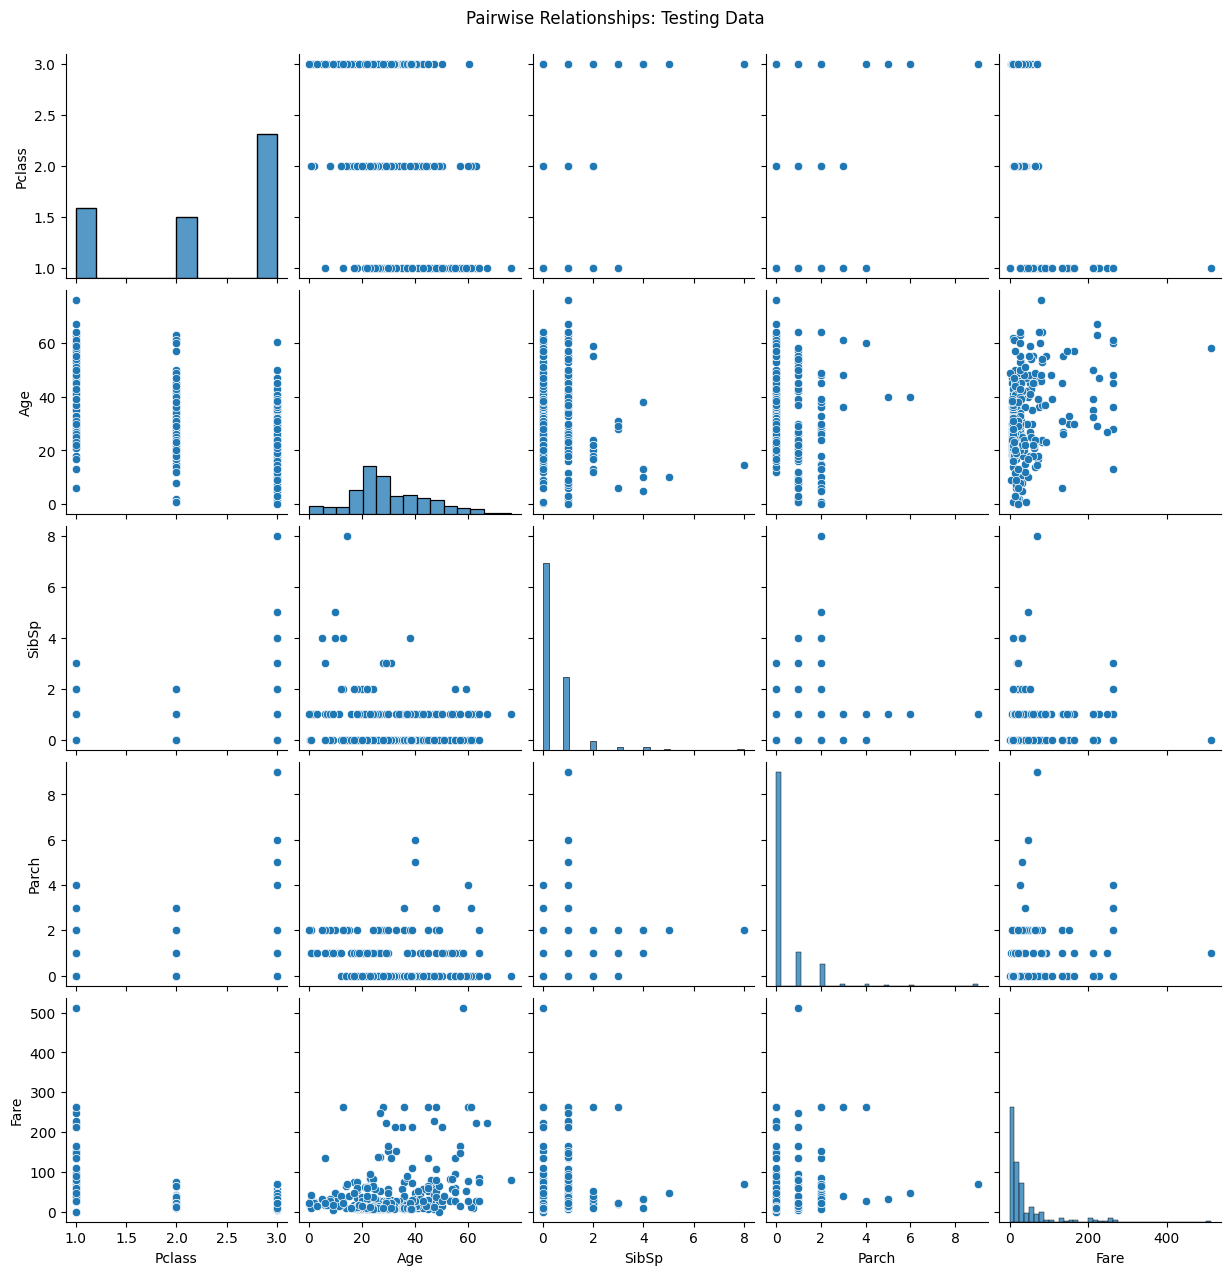

In [ ]:
test_numeric_cols = [
    "Pclass", "Age", "SibSp",
    "Parch", "Fare"]

plt.figure(figsize=(6,6))
sns.pairplot(test_df[test_numeric_cols])
plt.suptitle("Pairwise Relationships: Testing Data", y=1.02)
plt.show()

<Figure size 600x600 with 0 Axes>

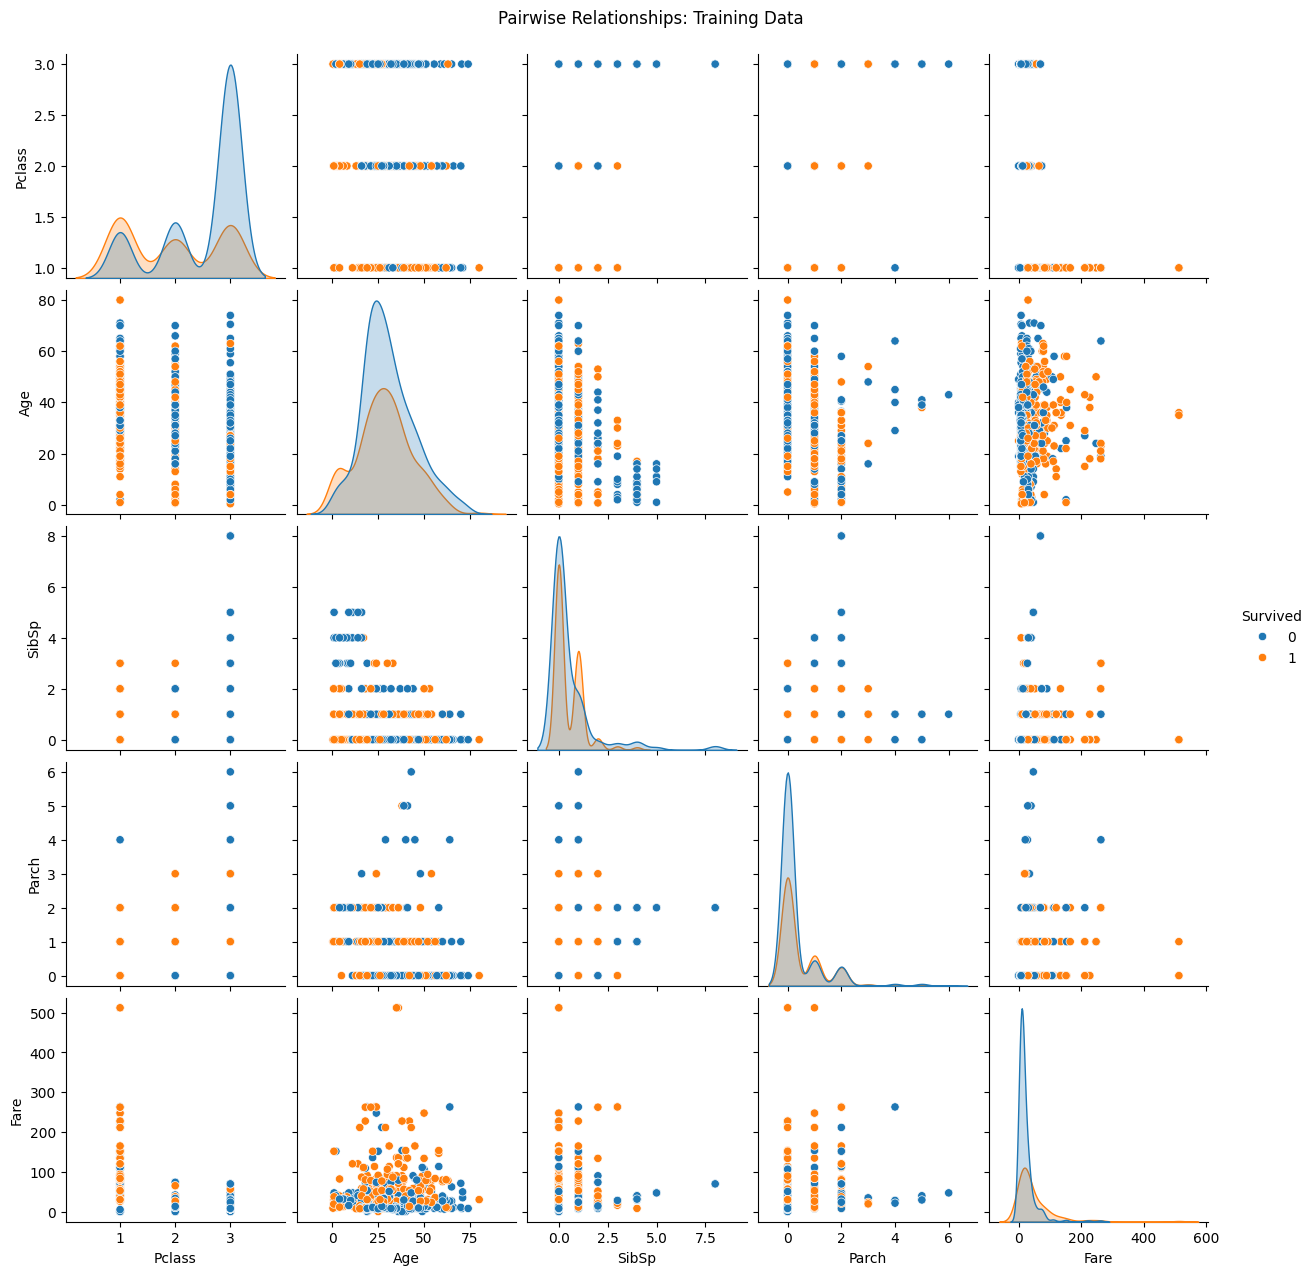

In [ ]:
train_numeric_cols = [
    "Survived", "Pclass", "Age", "SibSp",
    "Parch", "Fare"]

plt.figure(figsize=(6,6))
sns.pairplot(train_df[train_numeric_cols], hue="Survived")
plt.suptitle("Pairwise Relationships: Training Data", y=1.02)
plt.show()

## 3.8. Correlation Analysis

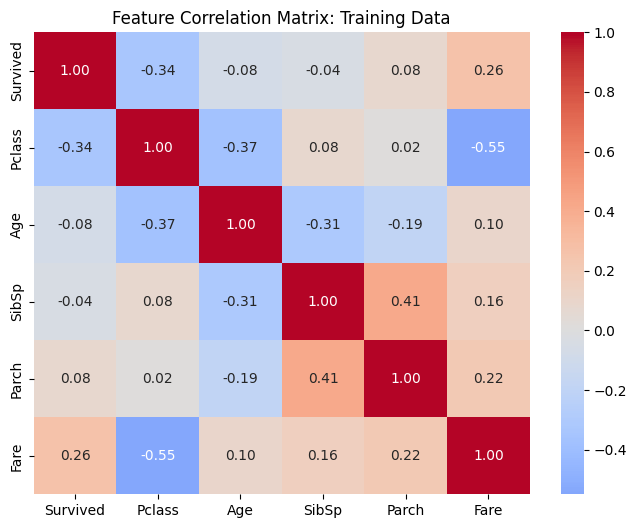

Top 5 features most correlated with price:
 Pclass   -0.338481
Fare      0.257307
Parch     0.081629
Age      -0.077221
SibSp    -0.035322
Name: Survived, dtype: float64


In [ ]:
corr = train_df[train_numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix: Training Data")
plt.show()

target_corr = corr["Survived"].drop("Survived").sort_values(key=np.abs, ascending=False)
print("Top 5 features most correlated with price:\n", target_corr.head())


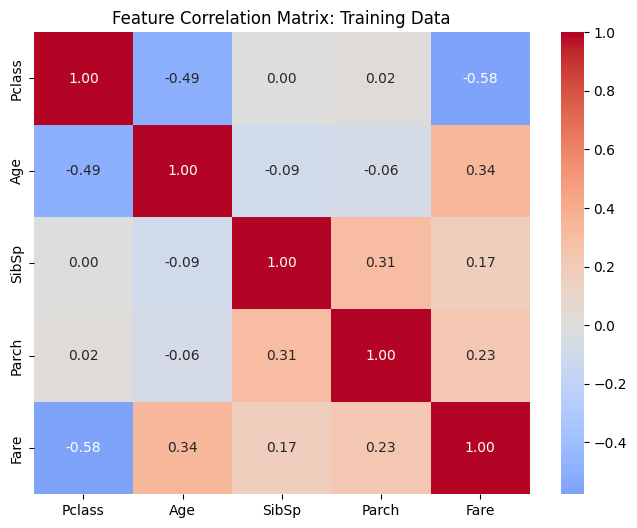

In [ ]:
corr = test_df[test_numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix: Training Data")
plt.show()


## 3.9. Countplot for `Survived` People

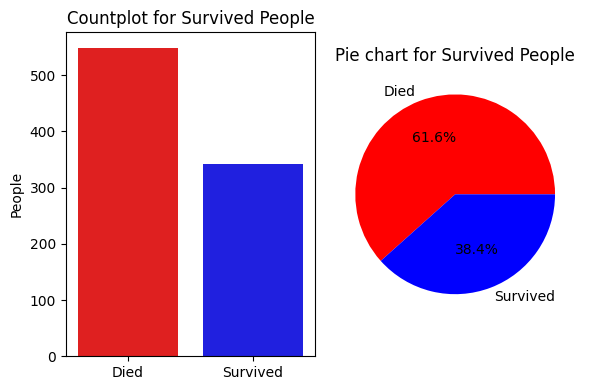

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# Countplot for people who survived
sns.countplot(
    x="Survived",
    hue="Survived",
    data=train_df,
    palette=["red", "blue"],
    ax=axes[0],
    dodge=False
)
axes[0].set_ylabel("People")
axes[0].set_xlabel("")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Died", "Survived"])
axes[0].set_title("Countplot for Survived People")
axes[0].legend_.remove()


# Pie chart for Survived People
train_df["Survived"].value_counts().plot.pie(
    autopct="%.1f%%",
    colors=["red", "blue"],
    labels=["Died", "Survived"],
    ax=axes[1]
)
axes[1].set_ylabel("")
axes[1].set_title("Pie chart for Survived People")

plt.tight_layout()
plt.show()

## 3.10. Countplot for `Survived` People by `Sex`

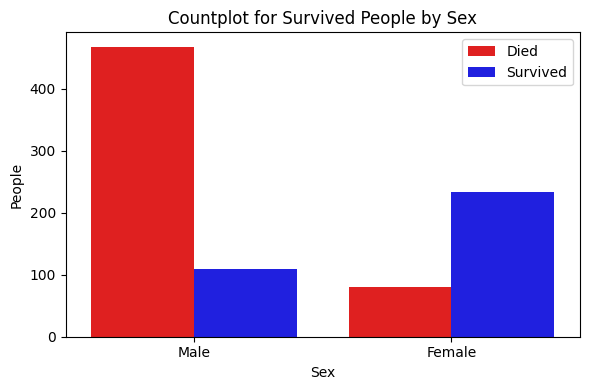

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 4))

sns.countplot(
    x="Sex",
    hue="Survived",
    data=train_df,
    palette=["red", "blue"]
)
ax.set_ylabel("People")
ax.set_xlabel("Sex")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Male", "Female"])
ax.set_title("Countplot for Survived People by Sex")

ax.legend(["Died", "Survived"], loc="upper right")
plt.tight_layout()
plt.show()

## 3.11. Countplot for `Survived` People by `Pclass` & `Embarked`

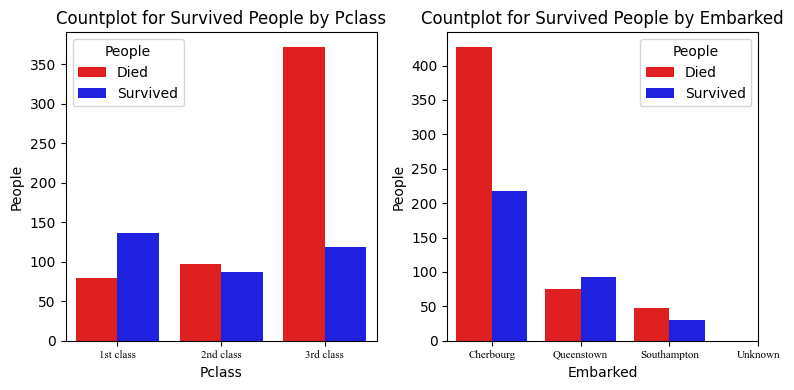

In [ ]:
# Countplot for people who survived by Pclass
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(x="Pclass", hue="Survived", data=train_df, palette=["red", "blue"], ax=axes[0])
axes[0].set_ylabel("People")
axes[0].set_xlabel("Pclass")
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(["1st class", "2nd class", "3rd class"], fontsize=8, fontname="Times New Roman")
axes[0].set_title("Countplot for Survived People by Pclass")
axes[0].legend(["Died", "Survived"], title="People", loc="upper left")

# Countplot for people who survived by Embarked
sns.countplot(x="Embarked", hue="Survived", data=train_df, palette=["red", "blue"], ax=axes[1])
axes[1].set_ylabel("People")
axes[1].set_xlabel("Embarked")
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(["Cherbourg", "Queenstown", "Southampton", "Unknown"], fontsize=8, fontname="Times New Roman")
axes[1].set_title("Countplot for Survived People by Embarked")
axes[1].legend(["Died", "Survived"], title="People", loc="upper right")

plt.tight_layout()
plt.show()

## 3.13. Outlier Detection and Treatment

### 3.13.1. Outliers `Fare`

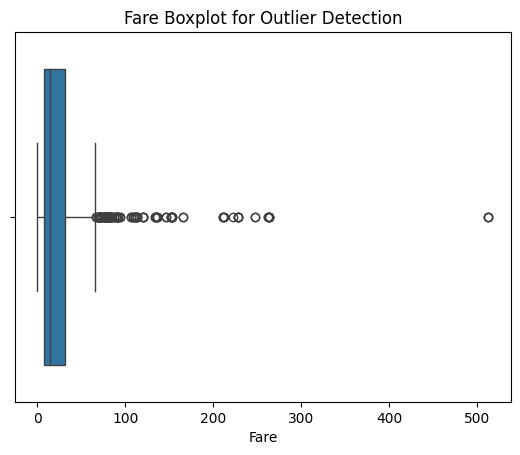

Number of outliers: 116


In [ ]:
# Boxplot for detecting outliers in "Fare"
sns.boxplot(x=train_df["Fare"])
plt.title("Fare Boxplot for Outlier Detection")
plt.show()

# Define outlier threshold using IQR method
Q1 = train_df["Fare"].quantile(0.25)
Q3 = train_df["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = train_df[(train_df["Fare"] < lower_bound) | (train_df["Fare"] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

# Optional: Cap outliers (Winsorizing)
train_df["Fare"] = train_df["Fare"].clip(lower=lower_bound, upper=upper_bound)


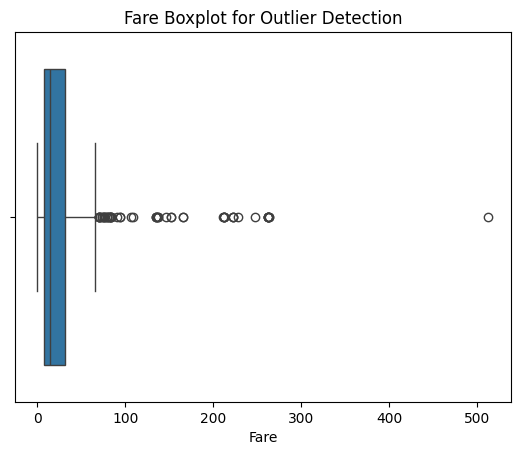

Number of outliers: 55


In [ ]:
# Boxplot for detecting outliers in "Fare"
sns.boxplot(x=test_df["Fare"])
plt.title("Fare Boxplot for Outlier Detection")
plt.show()

# Define outlier threshold using IQR method
Q1 = test_df["Fare"].quantile(0.25)
Q3 = test_df["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = test_df[(test_df["Fare"] < lower_bound) | (test_df["Fare"] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

# Optional: Cap outliers (Winsorizing)
test_df["Fare"] = test_df["Fare"].clip(lower=lower_bound, upper=upper_bound)


### 3.13.2. Outliers 'Age'

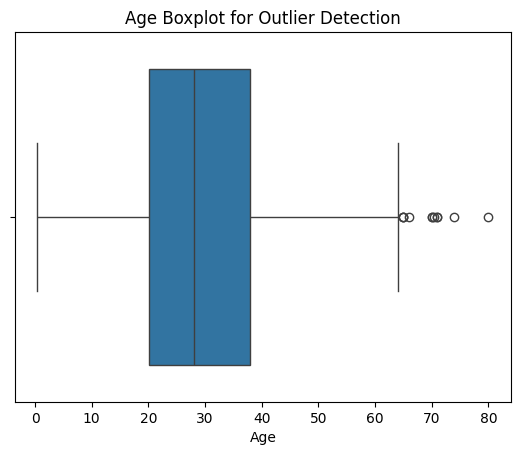

Number of outliers: 11


In [ ]:
# Boxplot for detecting outliers in "Age"
sns.boxplot(x=train_df["Age"])
plt.title("Age Boxplot for Outlier Detection")
plt.show()

# Define outlier threshold using IQR method
Q1 = train_df["Age"].quantile(0.25)
Q3 = train_df["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = train_df[(train_df["Age"] < lower_bound) | (train_df["Age"] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

# Optional: Cap outliers (Winsorizing)
train_df["Age"] = train_df["Age"].clip(lower=lower_bound, upper=upper_bound)


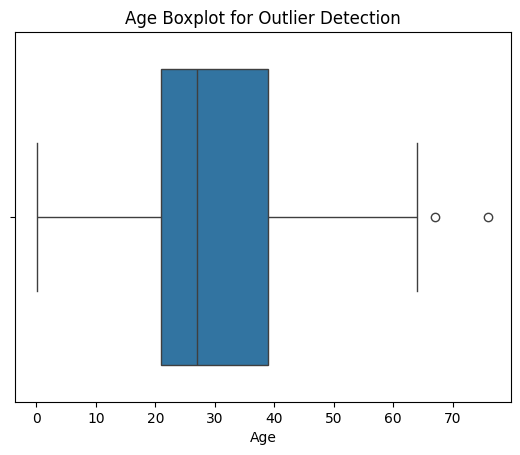

Number of outliers: 2


In [ ]:
# Boxplot for detecting outliers in "Age"
sns.boxplot(x=test_df["Age"])
plt.title("Age Boxplot for Outlier Detection")
plt.show()

# Define outlier threshold using IQR method
Q1 = test_df["Age"].quantile(0.25)
Q3 = test_df["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = test_df[(test_df["Age"] < lower_bound) | (test_df["Age"] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

# Optional: Cap outliers (Winsorizing)
test_df["Age"] = test_df["Age"].clip(lower=lower_bound, upper=upper_bound)
